In [304]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

import glob

In [305]:
files = glob.glob("imagens/*")
files

['imagens/russia.jpg',
 'imagens/blue-man-group.jpg',
 'imagens/willy-wonka.jpg',
 'imagens/tv-image-test.png',
 'imagens/seven.jpg']

In [306]:
imagem = cv2.imread(files[0], cv2.IMREAD_COLOR)

print(type(imagem))
print(imagem.shape[0])
print(imagem.shape[1])
print(imagem.shape[2])

<class 'numpy.ndarray'>
1024
1536
3


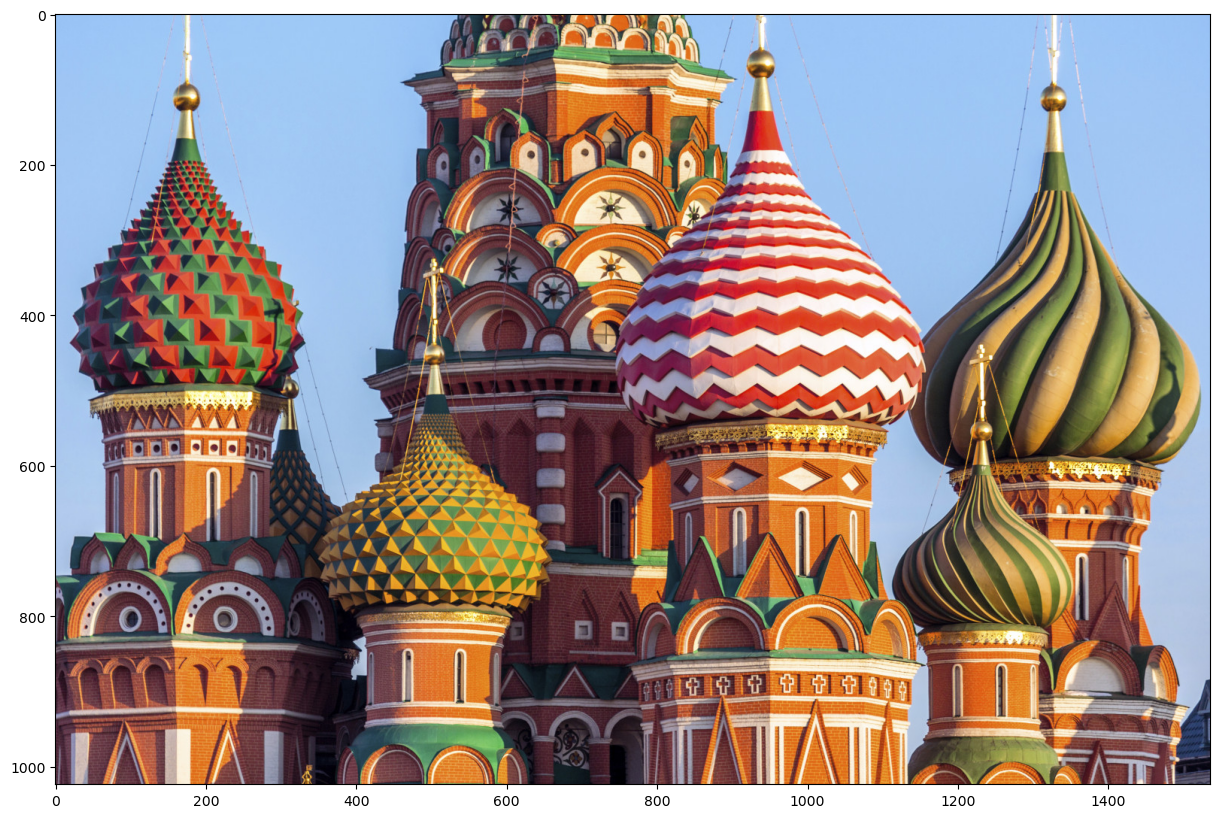

In [307]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


plt.figure(figsize = (20, 10))
plt.imshow(imagem)

In [308]:
cv2.imwrite("russian2.jpg", imagem)

True

In [309]:
(r, g, b) = imagem[0,0]

print(r, g, b)

152 194 244


In [310]:
imagem[0:300, 0:800] = (122, 120, 11)
(r, g, b) = imagem[0,0]


print(r, g, b)


122 120 11


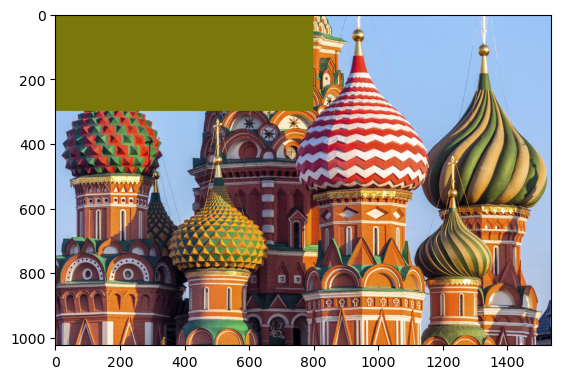

In [311]:
plt.imshow(imagem)

In [312]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

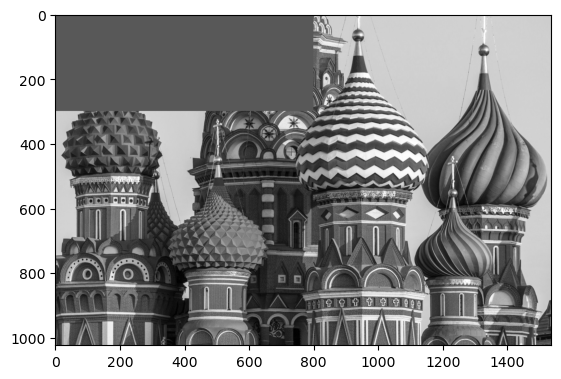

In [313]:
plt.imshow(imagem_gray, cmap ="gray")

In [314]:
g = imagem_gray[0,0]
print(g)

88


In [315]:
imagem_gray.shape

(1024, 1536)

In [316]:
imagem.shape

(1024, 1536, 3)

In [317]:
r,g,b = cv2.split(imagem)

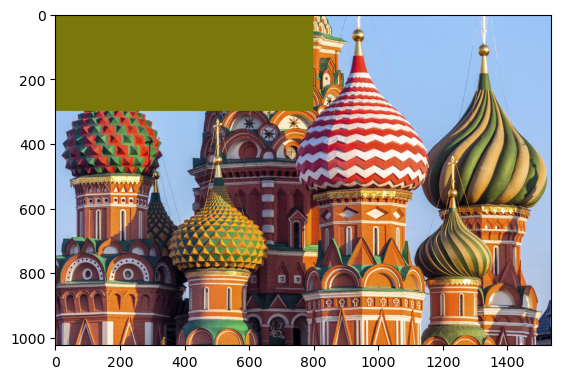

In [318]:
plt.imshow(imagem)

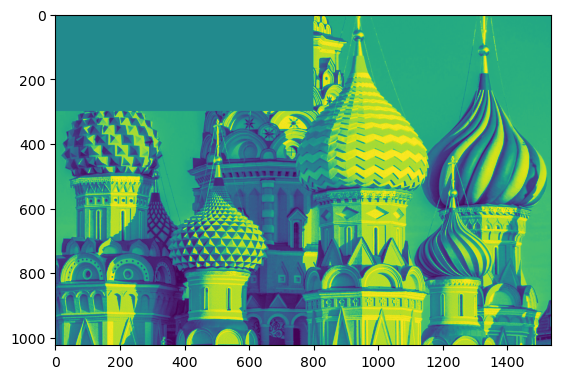

In [319]:
plt.imshow(r)

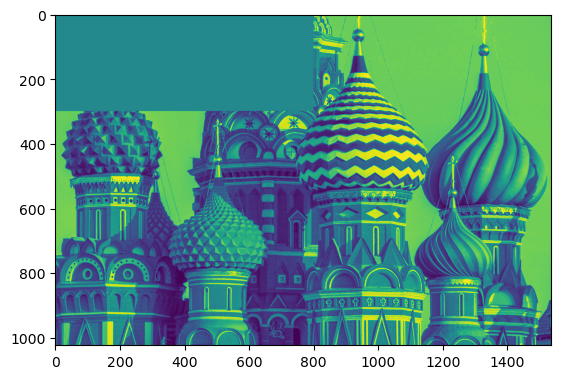

In [320]:
plt.imshow(g)

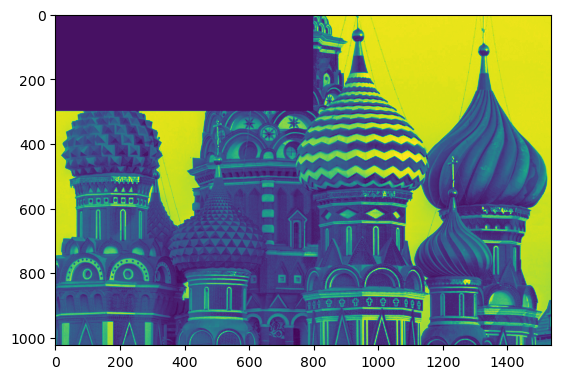

In [321]:
plt.imshow(b)

Text(0.5, 1.0, 'Russia Blue')

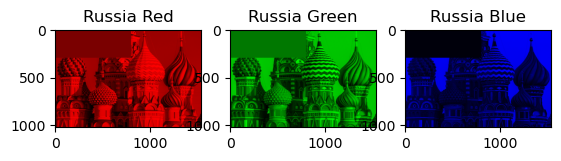

In [322]:
r, g, b = cv2.split(imagem)
imagem_vazia = np.zeros(imagem.shape[:2], dtype=np.uint8)

plt.subplot(1,3,1)
plt.imshow(cv2.merge([r, imagem_vazia, imagem_vazia]))
plt.title("Russia Red")

plt.subplot(1,3,2)
plt.imshow(cv2.merge([imagem_vazia, g, imagem_vazia]))
plt.title("Russia Green")

plt.subplot(1,3,3)
plt.imshow(cv2.merge([imagem_vazia, imagem_vazia, b]))
plt.title("Russia Blue")


In [323]:
imagem_vazia

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [324]:
imagem = cv2.imread(files[0], cv2.IMREAD_COLOR)

img_hsv = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)

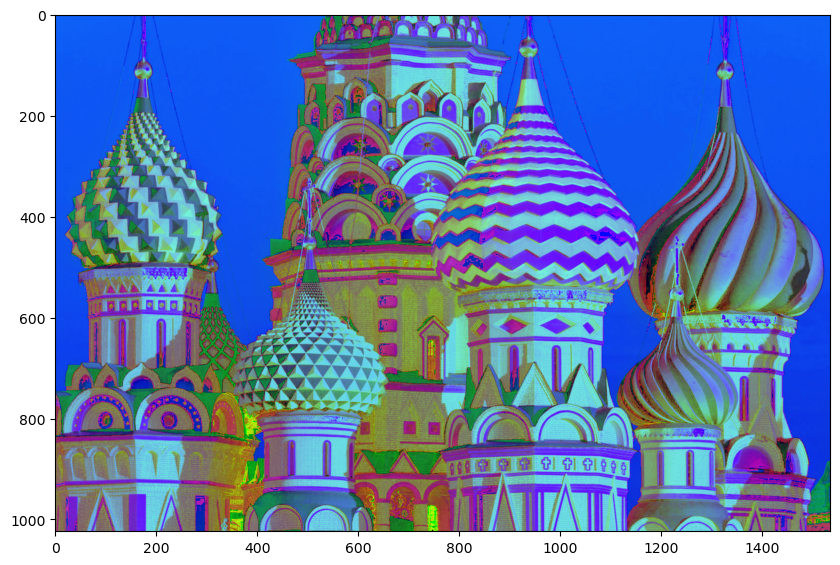

In [325]:
plt.figure(figsize = (10,8))

plt.imshow(img_hsv)

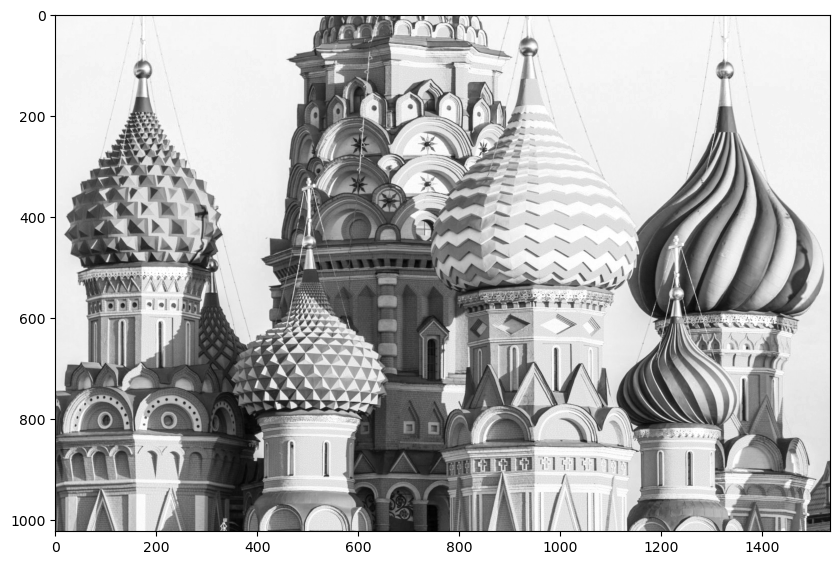

In [326]:
plt.figure(figsize=(10,8))

plt.imshow(img_hsv[1:,1:,2:], cmap = "gray");

In [327]:
files

['imagens/russia.jpg',
 'imagens/blue-man-group.jpg',
 'imagens/willy-wonka.jpg',
 'imagens/tv-image-test.png',
 'imagens/seven.jpg']

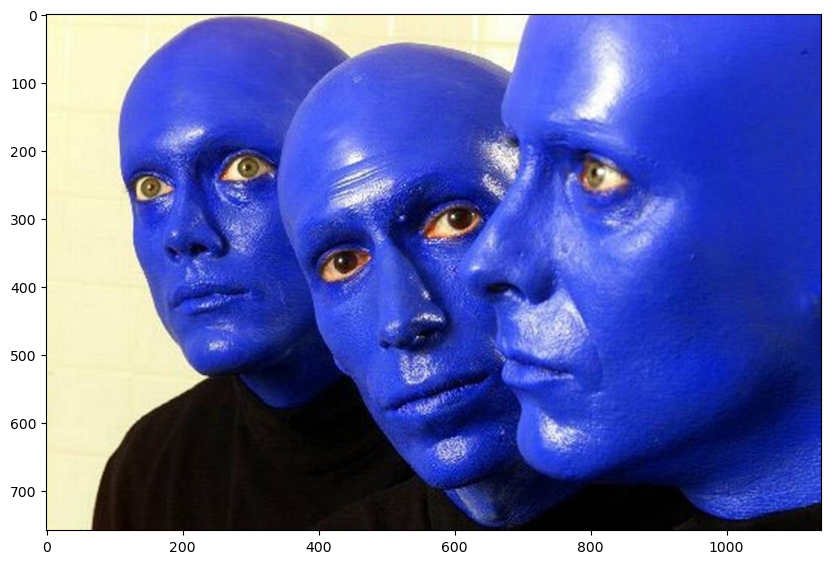

In [328]:
imagem = cv2.imread(files[1], cv2.IMREAD_COLOR)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(imagem);

In [329]:
cores = {"r":0, "g":1, "b":2}

In [330]:
def hist_bgr(imagem):
    for cor in cores:
        histograma = cv2.calcHist([imagem], [cores[cor]], None, [256], [0, 256])
        plt.plot(histograma)
        plt.xlim([0,256]);

def hist_sat(imagem_hsv):
    imagem_hsv = cv2.cvtColor(imagem_hsv, cv2.COLOR_BGR2HSV)
    hist_hue = cv2.calcHist([imagem_hsv], [0], None, [180], [0, 180])
    plt.plot(hist_hue);


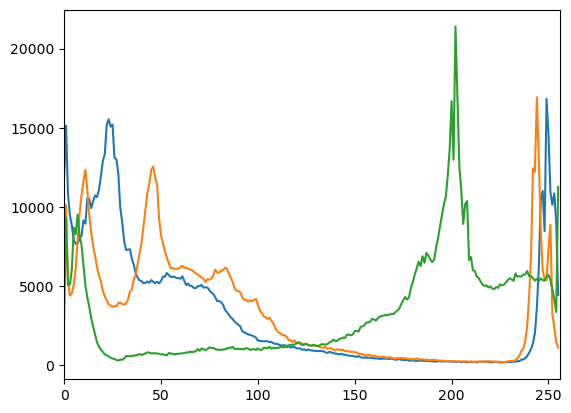

In [331]:
hist_bgr(imagem)

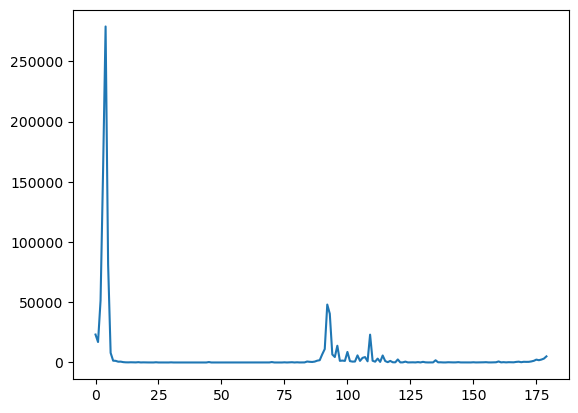

In [332]:
hist_sat(imagem)

In [333]:
img = np.zeros((512,512,3), np.uint8)

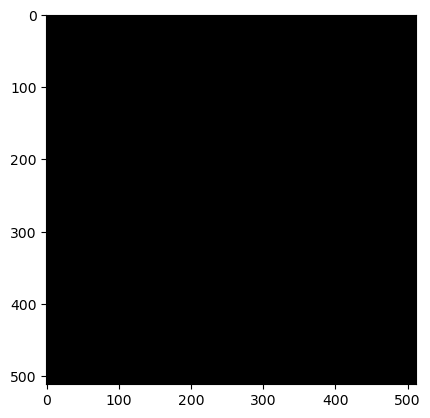

In [334]:
plt.imshow(img)

In [335]:
img_gray = np.zeros((512,512), np.uint8)

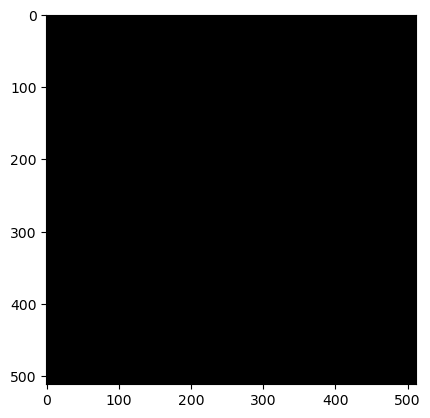

In [336]:
plt.imshow(img_gray, cmap = "gray")

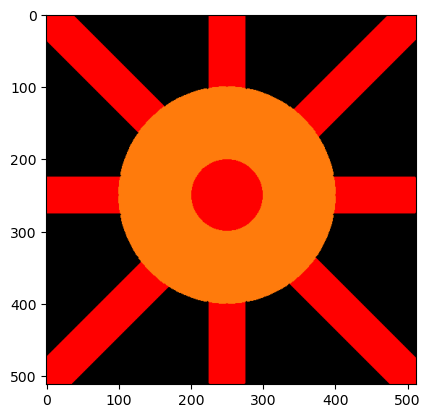

In [337]:
img = np.zeros((512,512,3), np.uint8)
cv2.line(img, (0, 0), (510,510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250,250), 100, (255, 123, 12), 100)

plt.imshow(img)

In [338]:
h, w = img.shape[:2]
matriz_rotacao = cv2.getRotationMatrix2D((50, 500), 10, 1)
print(matriz_rotacao)

[[  0.98480775   0.17364818 -86.06447648]
 [ -0.17364818   0.98480775  16.27853238]]


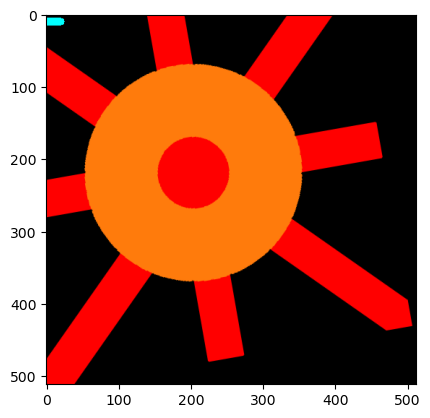

In [339]:
img = cv2.warpAffine(img, matriz_rotacao, (w, h))
cv2.line(img, (0, 10), (20,10), (0, 255, 255), 10)

plt.imshow(img)

In [340]:
h, w = img.shape[:2]
h_alt, w_alt = h / 4, w / 4

matriz_translacao = np.float32([[1, 0, 200], [0, 1, 0]])
print(matriz_translacao)

[[  1.   0. 200.]
 [  0.   1.   0.]]


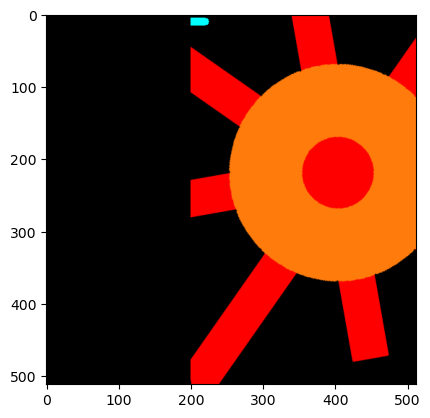

In [341]:
img = cv2.warpAffine(img, matriz_translacao, (w, h))

plt.imshow(img)

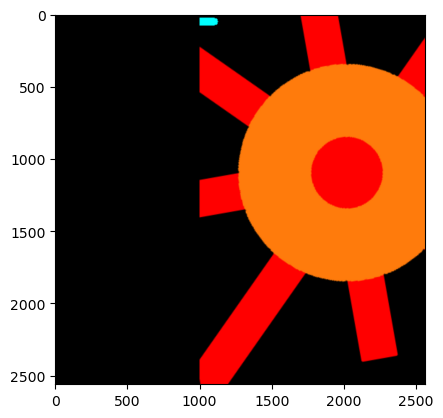

In [342]:
fx = 5
fy = 5

img = cv2.resize(img, None, fx = fx, fy = fy)
plt.imshow(img)

In [343]:
img = np.zeros((512,512,3), np.uint8)
cv2.line(img, (0, 0), (510,510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250,250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

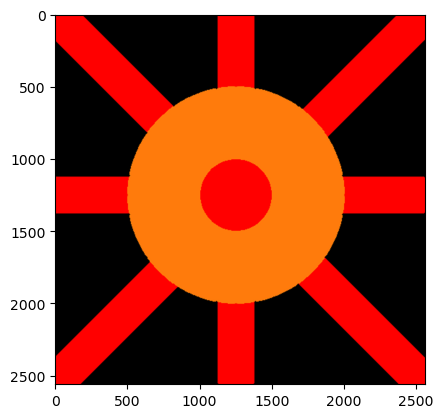

In [344]:
img = cv2.resize(img, None, fx = fx, fy = fy, interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [345]:
img = np.zeros((512,512,3), np.uint8)
cv2.line(img, (0, 0), (510,510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250,250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

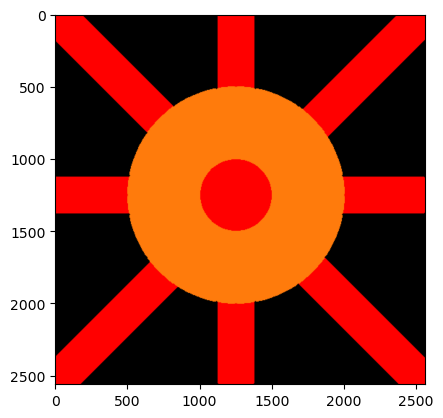

In [346]:
img = cv2.resize(img, None, fx = fx, fy = fy, interpolation=cv2.INTER_AREA)
plt.imshow(img)

In [347]:
img = np.zeros((512,512,3), np.uint8)
cv2.line(img, (0, 0), (510,510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250,250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

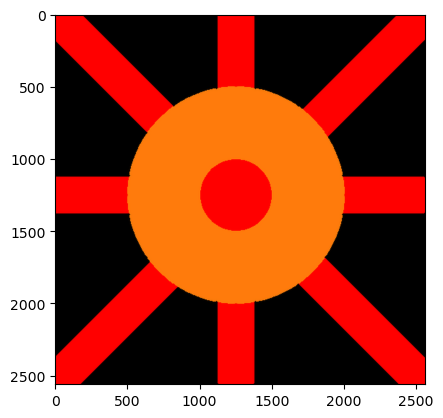

In [348]:
img = cv2.resize(img, None, fx = fx, fy = fy, interpolation=cv2.INTER_LANCZOS4)
plt.imshow(img)

In [349]:
img = np.zeros((512,512,3), np.uint8)
cv2.line(img, (0, 0), (510,510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250,250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

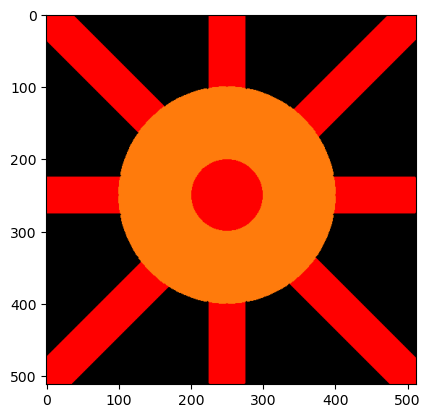

In [350]:
plt.imshow(img)

In [ ]:
p1 = (100, 300)
p2 = (300, 100)
p3 = (400, 300)
p4 = (300, 400)

tamanho_final = (700, 300)

pontos_marcadores = np.float32([p1,p2,p3,p4])
pontos_destino = np.float32([])